In [3]:
#Tuto 
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [4]:
x,y = make_regression(n_samples=100, n_features=1, noise=10)

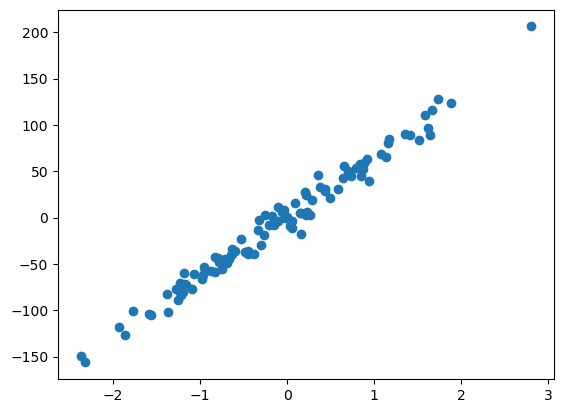

In [6]:
plt.scatter(x,y)

In [12]:
y = y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [20]:
#matrice X

X = np.hstack((x, np.ones(x.shape)))

In [23]:
#theta 
theta = np.random.randn(2,1)
print(theta)

[[-0.79091198]
 [-0.39879749]]


In [24]:
#Modele

def model(X, theta):
    return X.dot(theta)

In [30]:
#Fonction coût
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*(np.sum(model(X,theta)-y)**2)

In [65]:
#Gradient 
def grad(X,y,theta):
    m = len(y)
    return 1/m*(X.T.dot(model(X,theta)-y))


In [66]:
#Descente
def gradient_descente(X,y,theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate*grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

In [67]:
theta_final, histo = gradient_descente(X,y,theta,learning_rate=0.01,n_iteration=1000)

In [68]:
print(theta_final)

[[64.73497285]
 [ 0.95074562]]


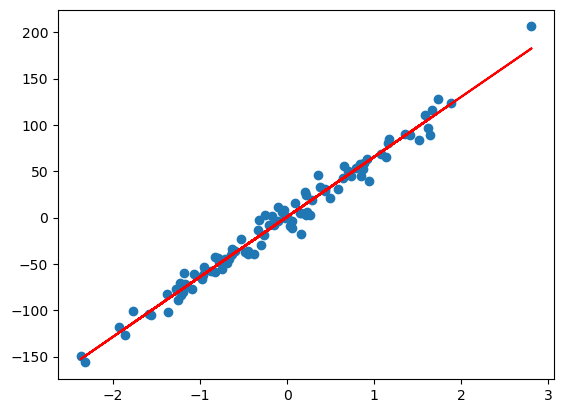

In [69]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

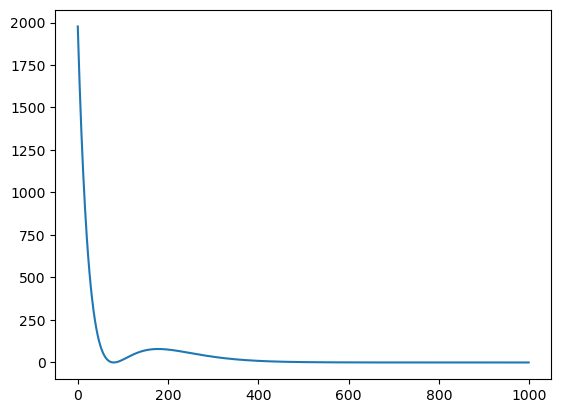

In [70]:
plt.plot(range(1000), histo)

In [72]:
#Coefficient de determination
def coef_determination(y,predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [73]:
coef_deter = coef_determination(y,predictions=predictions)

In [74]:
print(coef_deter)

0.9789665088946953
